In [1]:
import numpy as np
import pandas as pd 
import random 
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


# EDA of train.csv

In [2]:
# load the data
train = pd.read_csv('train.csv')
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 31 µs


## The shape of train dataset

In [3]:
train.shape

(101230332, 10)

In [4]:
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


## Print the head of the train.csv

In [5]:
train.head(5)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


## Count the missing vaule for each feature

In [6]:
train.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

## The number of total user_id and unique_id

In [7]:
total_id = train['user_id'].count()
unique_id = len(train['user_id'].unique())

### The numbers of total user_ids

In [8]:
total_id

101230332

### The number of unique user_ids

In [9]:
unique_id

393656

## The dirstribution of Each Feature

### The correalation of each feature 

<AxesSubplot:>

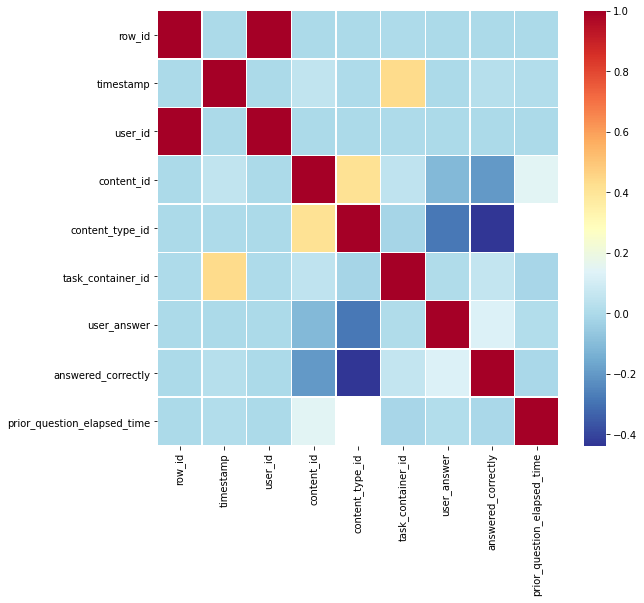

In [10]:
cor = train.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(cor, ax=ax, cmap='RdYlBu_r', linewidths=0.5)

### The distribution of correct answer

Text(0.5, 1.0, 'The Distribution of Corrent Answer')

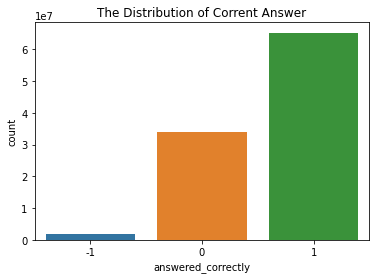

In [11]:
sns.countplot(x=train['answered_correctly'])
plt.title("The Distribution of Corrent Answer")

### The distribution of user_answer

Text(0.5, 1.0, 'The Distribution of user_answer')

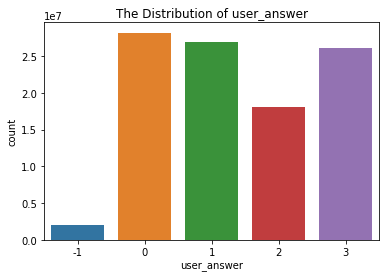

In [12]:
sns.countplot(x= train['user_answer'])
plt.title("The Distribution of user_answer")

### The distribution of content type 

Text(0.5, 1.0, 'The distribution of content type')

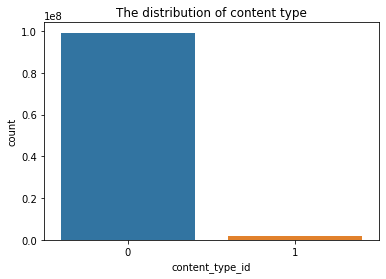

In [13]:
sns.countplot(x=train['content_type_id'])
plt.title("The distribution of content type")

### The distribution of prior question has been explaination

<AxesSubplot:xlabel='prior_question_had_explanation', ylabel='count'>

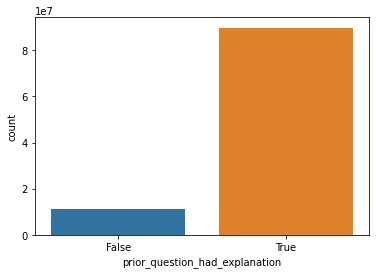

In [15]:
sns.countplot(x= train['prior_question_had_explanation'])

### The distribution of the most used content ids

In [16]:
x = train['content_id'].value_counts()[:20]

Text(0.5, 1.0, 'Top 20 most used content ids')

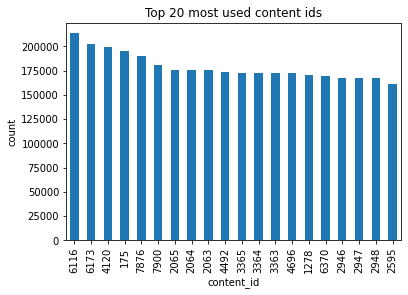

In [17]:
x.plot.bar()
plt.xlabel('content_id')
plt.ylabel('count')
plt.title('Top 20 most used content ids')

### The distribution of timestamp

Text(0.5, 0, 'The months between this user interaction  and the first event completion from that user')

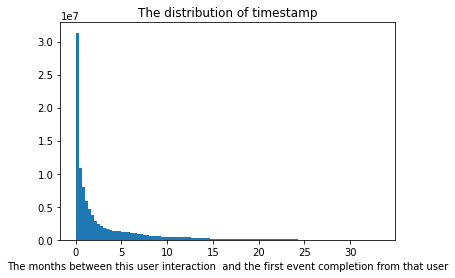

In [18]:
ts = train['timestamp']/(31536000000/12)
plt.hist(ts,bins=100)
plt.title('The distribution of timestamp')
plt.xlabel('The months between this user interaction  and the first event completion from that user')

### The relationship between the total number of answered questions and correct precent

In [19]:
user_percent = train[train.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Count = 'count', Mean = 'mean')

Text(0.5, 1.0, 'The relationship between the number of question answered and the correct precent')

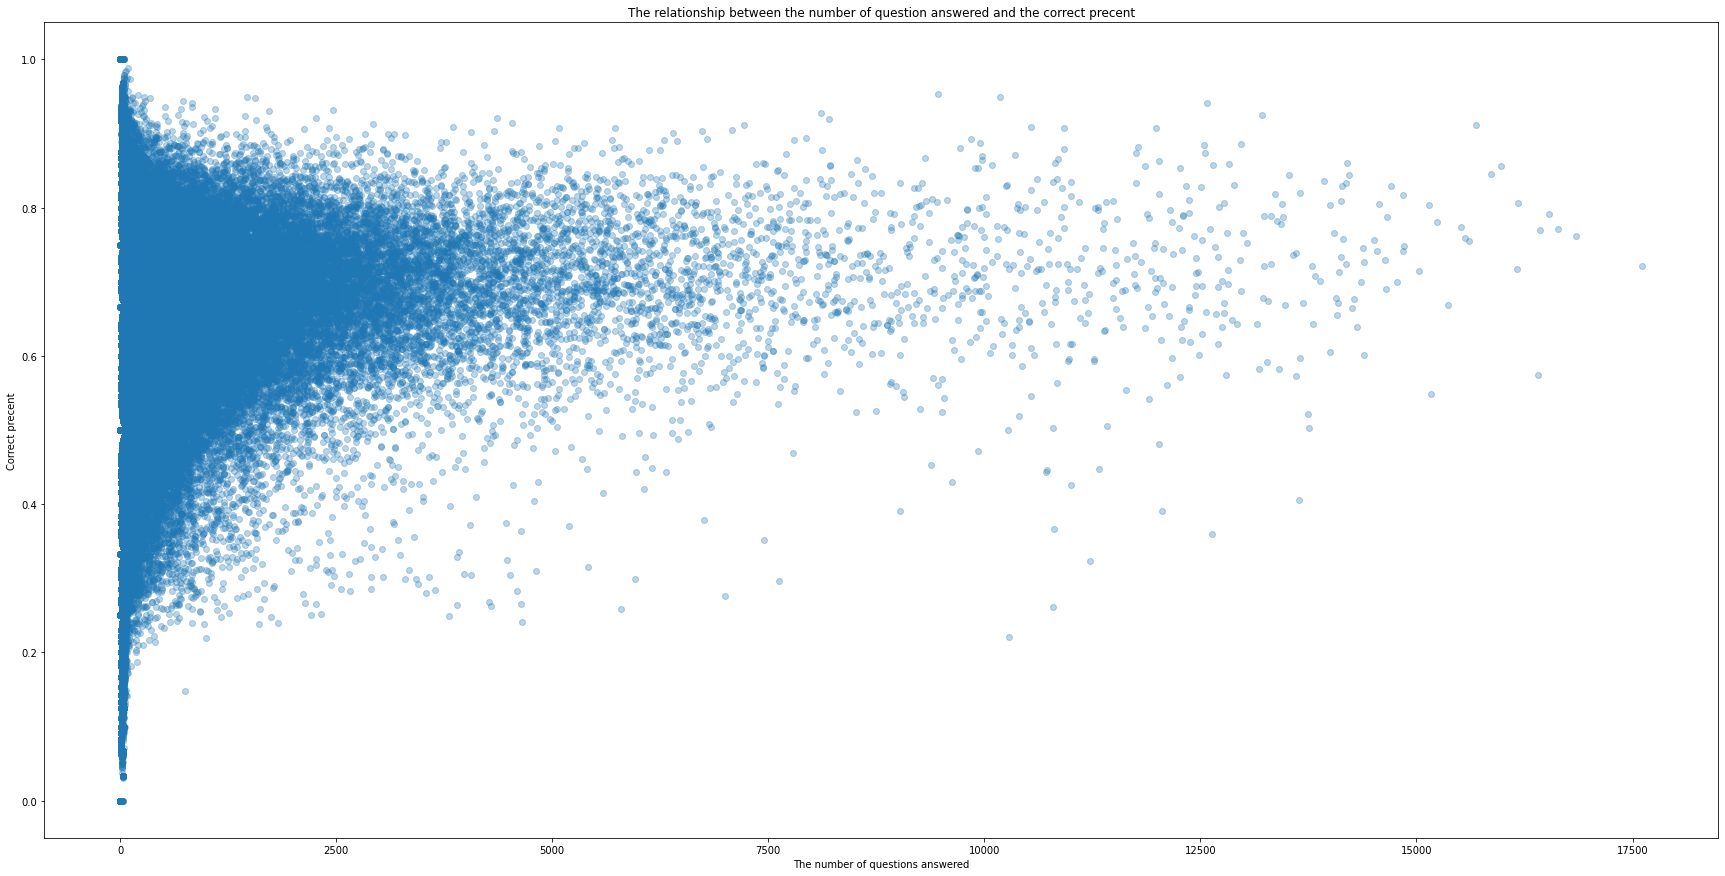

In [20]:
# user_percent = user_percent.query
plt.figure(figsize=(30,15))
x = user_percent.Count
y = user_percent.Mean
plt.scatter(x,y, alpha= 0.3)
plt.xlabel("The number of questions answered")
plt.ylabel('Correct precent')
plt.title('The relationship between the number of question answered and the correct precent')

### The relationship between correct precent and prior question had explanation or not

In [21]:
prior_explanation = train[train.answered_correctly != -1].groupby(['prior_question_had_explanation']).agg({'answered_correctly': ['mean']})

Text(0.5, 1.0, 'The relationship between correct precent and prior question had explanation or not')

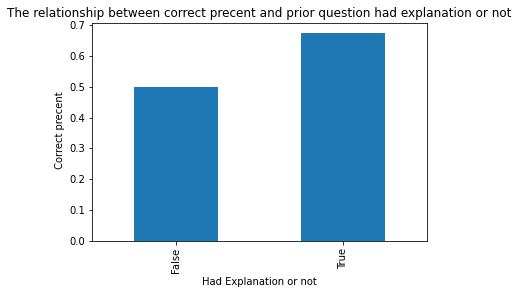

In [22]:
prior_explanation.plot.bar(legend = None)
plt.xlabel('Had Explanation or not')
plt.ylabel(' Correct precent')
plt.title('The relationship between correct precent and prior question had explanation or not')

### The relationship between the number of total answers and Total time spend

In [23]:
user_percent = train[['user_id','answered_correctly','prior_question_elapsed_time']]
a = user_percent[user_percent.answered_correctly != -1 ].groupby(['user_id','answered_correctly'])[['answered_correctly','prior_question_elapsed_time']].agg({'answered_correctly':'count','prior_question_elapsed_time':'sum'})
a['prior_question_elapsed_time'] = a['prior_question_elapsed_time'].map(lambda x: x/60000)
a.columns = ['Total Number', 'Total Time in minutes']
b = a.reset_index()

Text(0.5, 1.0, 'The relationship between the number of total answers and Total time spend')

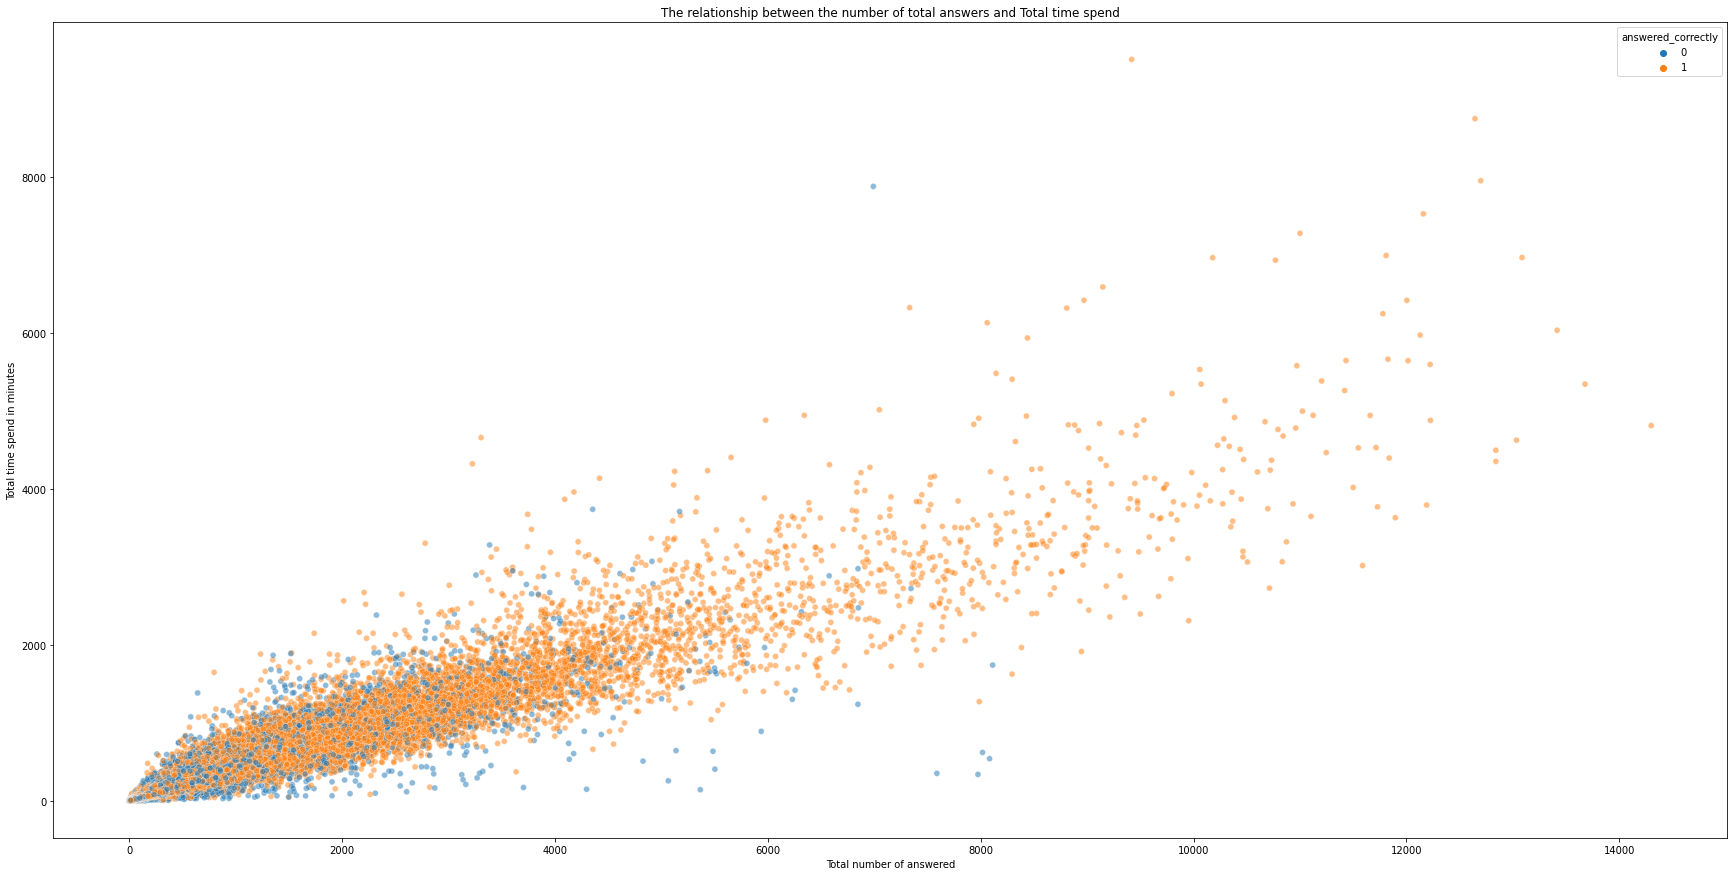

In [24]:
plt.figure(figsize=(30,15))
sns.scatterplot(x = b['Total Number'], y= b['Total Time in minutes'],hue=b['answered_correctly'],alpha=0.5)
plt.ylabel('Total time spend in minutes')
plt.xlabel('Total number of answered')
plt.title('The relationship between the number of total answers and Total time spend')

# EDA of question.csv

In [25]:
# load datset
question = pd.read_csv('questions.csv')

## The shape of question dataset

In [38]:
question.shape

(13523, 5)

## The Detail of each feature

In [39]:
question.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


## The head of question.csv

In [302]:
question.head(10)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


## The missing vaule of each feature

In [41]:
question.isnull().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

## The Dirstribution of each feature

### The Correlation of each feature 

Text(0.5, 1.0, 'The correlationship in question dataset')

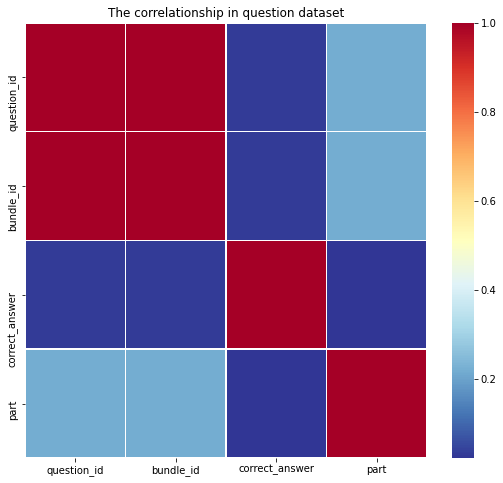

In [42]:
cor = question.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cor,ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5)
plt.title("The correlationship in question dataset")

### The distribution of correst_answer

<AxesSubplot:xlabel='correct_answer', ylabel='count'>

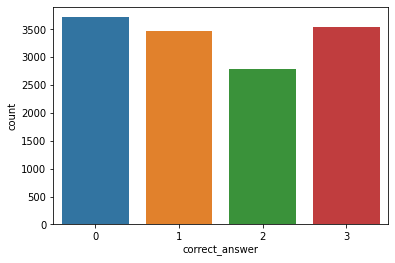

In [43]:
sns.countplot(x= question['correct_answer'])

### The distribution of part

<AxesSubplot:xlabel='part', ylabel='count'>

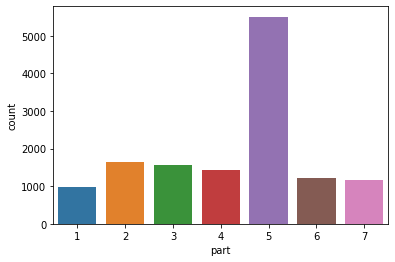

In [45]:
sns.countplot(x= question['part'])

In [46]:
question['bundle_id'].value_counts()

7795    5
6971    5
7421    5
7770    5
8144    5
       ..
8385    1
197     1
6342    1
4295    1
0       1
Name: bundle_id, Length: 9765, dtype: int64

# EDA of lecture.csv

In [47]:
# load the dataset
lecture = pd.read_csv('lectures.csv')

## The shape of lecture dataset

In [48]:
lecture.shape

(418, 4)

## The detail of each feature

In [49]:
lecture.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


## The head of lecture dataset

In [50]:
lecture.head(5)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


## The missing value of each feature

In [51]:
lecture.isnull().sum()

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

## The distribution of each feature

### The Correlation of each feature

Text(0.5, 1.0, 'The correlationship in lecture dataset')

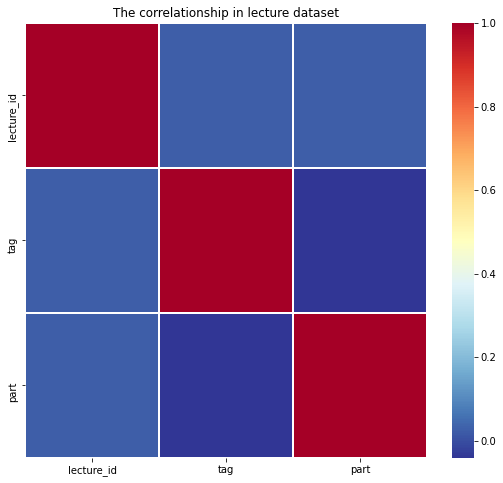

In [52]:
cor = lecture.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cor,ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5)
plt.title("The correlationship in lecture dataset")

### The distribution of level category code for the lecture

<AxesSubplot:xlabel='part', ylabel='count'>

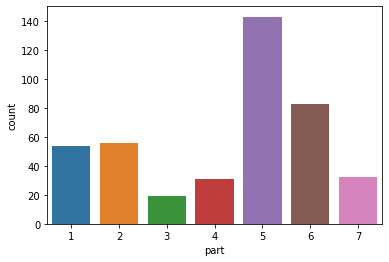

In [53]:
sns.countplot(x= lecture['part'])

### Top 30 Lecture Tag

<AxesSubplot:>

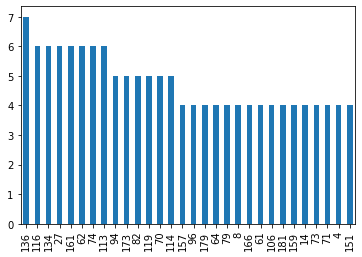

In [294]:

top_tag = lecture['tag'].value_counts().sort_values(ascending = False)[:30]
top_tag.plot(kind='bar')
plt.title('Top 30 lecture Tag')

### The distribution of purpose of lecture

Text(0.5, 1.0, 'The distribution of purpose of lecture')

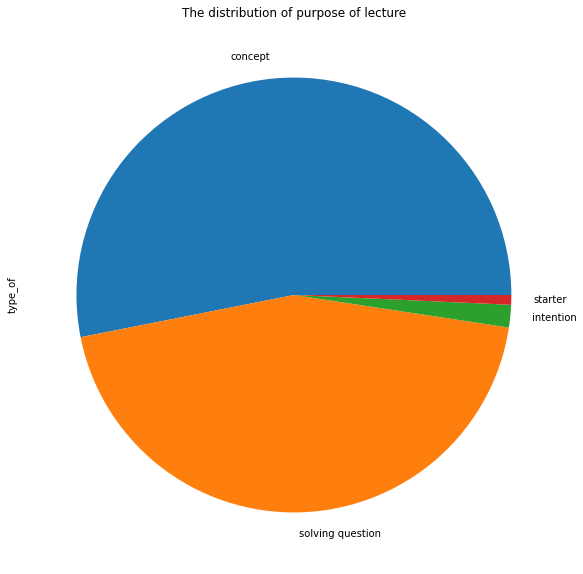

In [299]:
plt.figure(figsize=(10,10))
lecture['type_of'].value_counts().plot(kind = 'pie', )
plt.title('The distribution of purpose of lecture')